In [303]:
#created by Gearlad

%env KERAS_BACKEND = tensorflow
import keras
import numpy as np
import tensorflow as tf
%matplotlib inline

print('Keras version: ', keras.__version__) #list version

env: KERAS_BACKEND=tensorflow
Keras version:  2.2.4


#### Import Mnist dataset

In [304]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [305]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

#### Simplify the data

In [306]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [307]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [308]:
from tensorflow.keras.layers import Input, Dense, Activation, concatenate
from tensorflow.keras.models import Model, Sequential

In [309]:
f1 = Dense(100, activation='relu')
f2 = Dense(100, activation='relu')
f3 = Dense(100, activation='relu')
f4 = Dense(100, activation='relu')
f5 = Dense(50, activation='relu')
f6 = Dense(50, activation='relu')
f7 = Dense(25, activation='relu')
f8 = Dense(10, activation='softmax')

In [310]:
x = Input(shape=(784,))

In [311]:
#### Hidden layers of Neural Network 打造神經網路

In [312]:
h1 = f1(x)
h2 = f2(x)
h3 = f3(x)
h4 = f4(x)
c1 = concatenate([h1,h2,h3,h4])
h5 = f5(c1)
h6 = f6(h5)
h7 = f7(h6)
y = f8(h7)

In [313]:
y

<tf.Tensor 'dense_190/Softmax:0' shape=(None, 10) dtype=float32>

## Neural Network Schematic with Hidden Layers and Concatenation

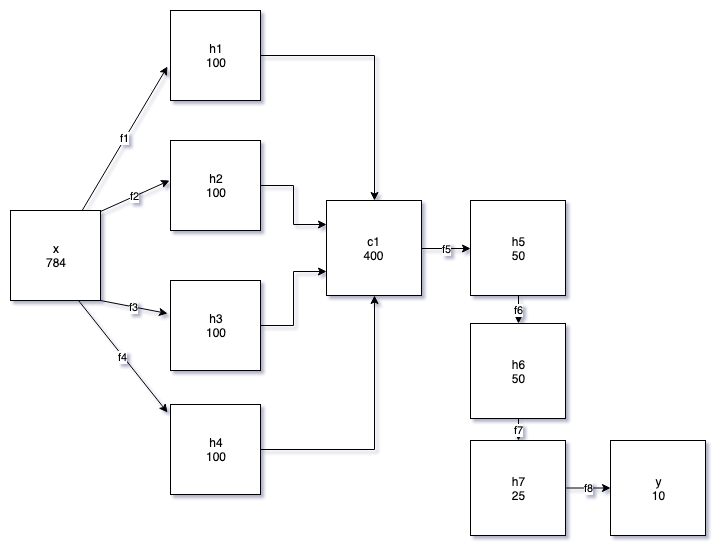

In [314]:
model = Model(x, y)
model.summary()

Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_183 (Dense)               (None, 100)          78500       input_23[0][0]                   
__________________________________________________________________________________________________
dense_184 (Dense)               (None, 100)          78500       input_23[0][0]                   
__________________________________________________________________________________________________
dense_185 (Dense)               (None, 100)          78500       input_23[0][0]                   
___________________________________________________________________________________________

In [315]:
import keras.optimizers
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=120, epochs=20, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 44us/sample - loss: 0.3732 - accuracy: 0.8881 - val_loss: 0.1829 - val_accuracy: 0.9470
Epoch 2/20
48000/48000 [==============================] - 2s 39us/sample - loss: 0.1258 - accuracy: 0.9632 - val_loss: 0.1144 - val_accuracy: 0.9688
Epoch 3/20
48000/48000 [==============================] - 2s 36us/sample - loss: 0.0811 - accuracy: 0.9762 - val_loss: 0.0918 - val_accuracy: 0.9737
Epoch 4/20
48000/48000 [==============================] - 2s 39us/sample - loss: 0.0585 - accuracy: 0.9823 - val_loss: 0.0961 - val_accuracy: 0.9721
Epoch 5/20
48000/48000 [==============================] - 2s 36us/sample - loss: 0.0413 - accuracy: 0.9871 - val_loss: 0.0881 - val_accuracy: 0.9749
Epoch 6/20
48000/48000 [==============================] - 2s 38us/sample - loss: 0.0316 - accuracy: 0.9902 - val_loss: 0.0911 - val_accuracy: 0.9752
Epoch 7/20
48000/48000 [==============================] 

In [316]:
#### Use the example from class

In [317]:
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 0s 44us/sample - loss: 0.1100 - accuracy: 0.9787
loss: 0.10996987699029433
正確率 0.9787


In [318]:
#### Export the produced model to a JSON file

In [319]:
model_json = model.to_json()
open('model.json', 'w').write(model_json)
model.save_weights('model_weights.h5')